In [1]:
import numpy as np
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import cv2
from skimage import img_as_float
import skimage.exposure



### Questão 1
No editor, faça 4 funções temporais descritas abaixo, nas quais f1 = 1Hz, f2 = 3Hz, f3=5Hz, e t é um vetor tempo que vai de t = 0: 0.01: 10.

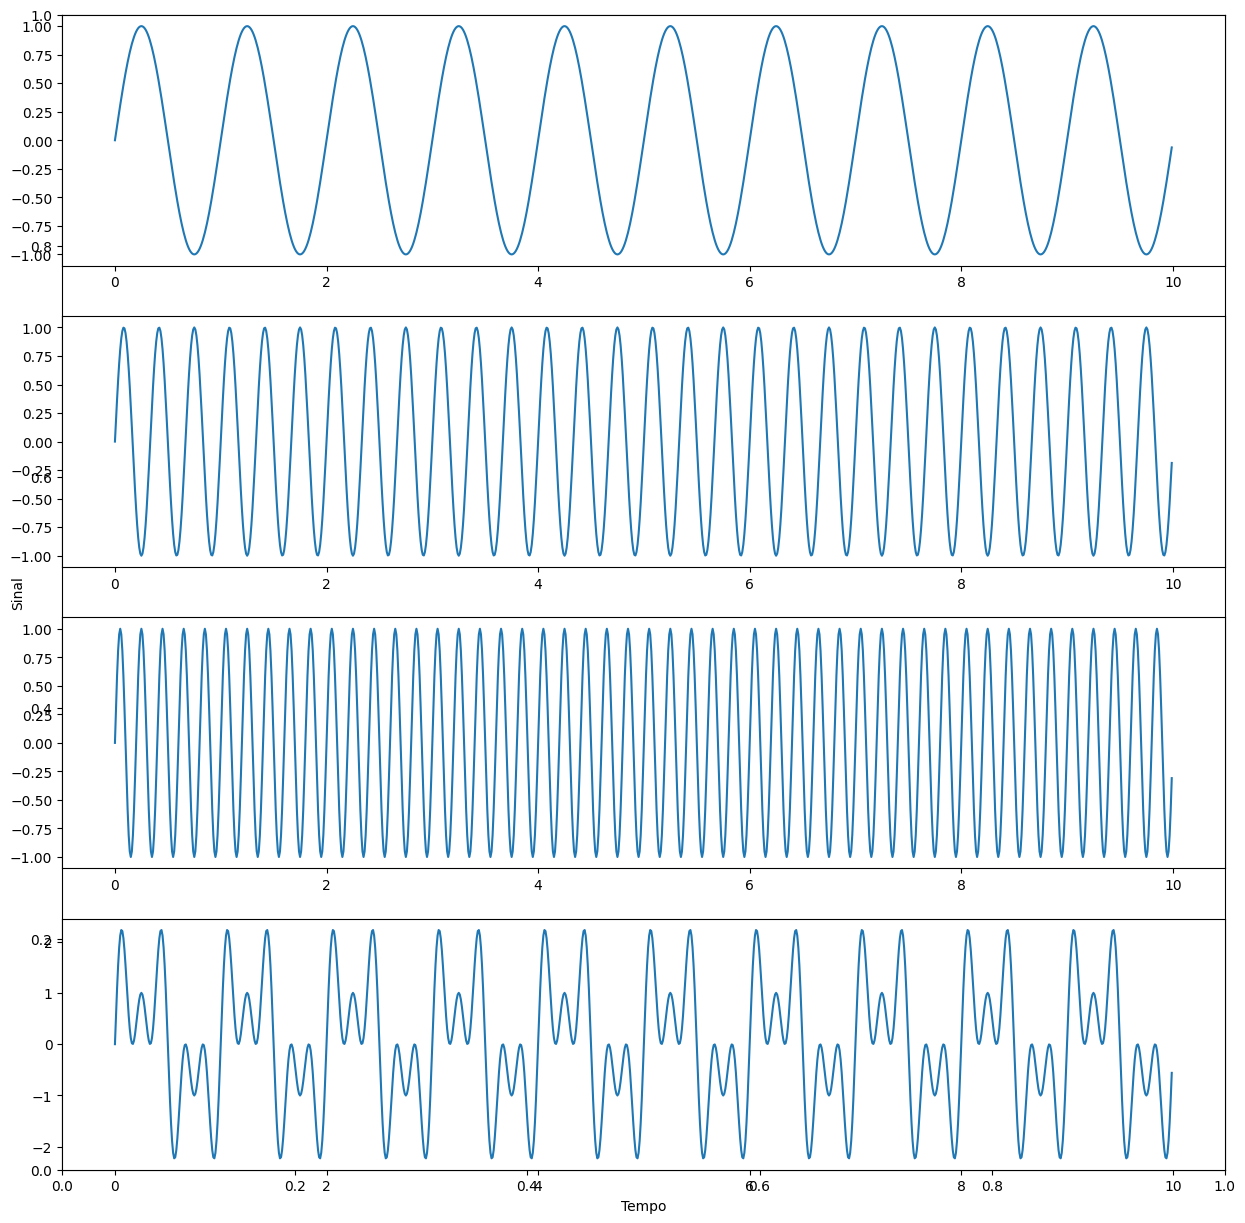

In [ ]:
#vetor tempo precisa ser inicializado em 0 e ir até 10 de 0,01 em 0,01. 
#sintaxe: np.arange([start],[stop], [step], dtype = None) 
#dtype define o tipo de dado: float ou int ##opcional##
t = np.arange(0, 10, 0.01, dtype = float)

# criar uma única janela para todos os gráficos 
plot.figure(figsize = (15,15)) ##o elemento dentro do figure ajusta o tamanho da imagem gerada. 
plot.ylabel('Sinal')
plot.xlabel('Tempo')
# Fourier
#usamos o subplot: função dentro do matplot para organizar vários gráficos em uma única janela.
#SINTAXE do subplot: subplot.(n_linhas, n_colunas, a posição que este gráfico ocupa no eixo)
# para plotar funções de 1D -caso dos sinais(são considerados unidimensionais pois eles só variam em relação ao tempo) - usamos o plot.plot(eixo_x, eixo_y)
# imagem é 2D -  a intensidade de cada pixel depende de duas variáveis independentes: a posição horizontal ($x$) e a posição vertical ($y$).Como você acessa os dados: Para encontrar a cor de um pixel específico, você precisa obrigatoriamente de dois números: a linha e a coluna (coordenadas $x, y$).
s1 = np.sin(2*np.pi*1*t)
plot.subplot(4,1,1)
plot.plot(t,s1)

s2 = np.sin(2* np.pi * 3 * t)
plot.subplot(4,1,2)
plot.plot(t,s2)

s3 = np.sin( 2 * np.pi * 5 * t)
plot.subplot(4,1,3)
plot.plot(t, s3)

#fazendo a soma 
s = s1 + s2 + s3
plot.subplot(4,1,4)
plot.plot(t, s)



Obter o módulo da transformada: temos que a TF é a correlação entre a função de transformação com o complexo de Euler

<StemContainer object of 3 artists>

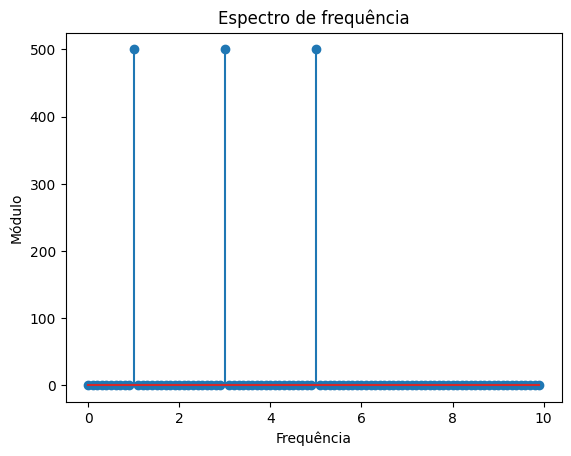

In [3]:
# o enunciado pede para fazermos uma varredura de 0 a 10 Hz
# Vamos testar o nosso sinal com diferentes frequências com o objetivo de encontrar determinada frequência dentro do sinal(vale lembrar que o sinal possui três frequências: 1,3 e 5Hz).
#vamos de 0,1 em 0,1 para a verificação ser mais criteriosa.
coeficientes = []
#criando um vetor de frequências.
frequencia = np.arange(0, 10, 0.1)

for i in frequencia:
    euler = np.exp(-(-1)**(0.5) * 2 * np.pi * i * t)
    #usamos a soma para aproximar a integral - se o sinal não 
    correlacao = np.sum(s*euler)
    # cada valor da correlação será armazenado no vetor coeficiente - cada valor é o resultado da integral(correlação) para uma função específica. 
    coeficientes.append(correlacao)
# com o módulo vamos tranformar valores complexos em reais. 
modulo = np.abs(coeficientes)

plot.figure()
plot.title('Espectro de frequência')
plot.xlabel('Frequência')
plot.ylabel('Módulo')
plot.stem(frequencia, modulo)


### Questão 2 e 3
A própria imagem do pulso quadrado está no **domínio espacial**. Isso significa que os valores dos pixels representam intensidade luminosa em uma coordenada (x,y) específica.

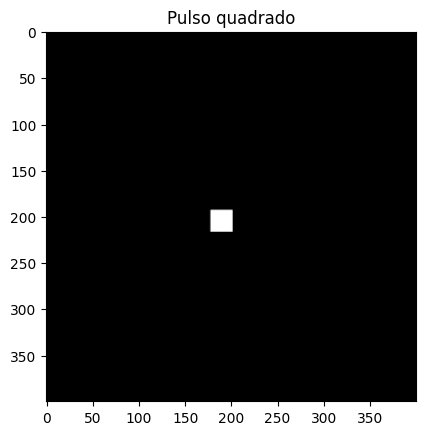

In [4]:
# ler e normalizar a imagem 
pulso = cv2.imread(r"C:\Unifesp\imagens_biomedicas\aula5_transformada_de_fourier\PulsoQuadrado1.pgm",0)
pulso = skimage.img_as_float(pulso)

plot.figure()
plot.title('Pulso quadrado')
plot.imshow(pulso, cmap = 'gray')

### Fazer transformada de Fourier 2D (imagem) acima
Aqui queremos observar como a imagem (que está no domínio pixels) se comporta quando é convertida para o domínio da frequência. 
* **Módulo:** indica a "quantidade de energia" que existe naquela frequência específica. 

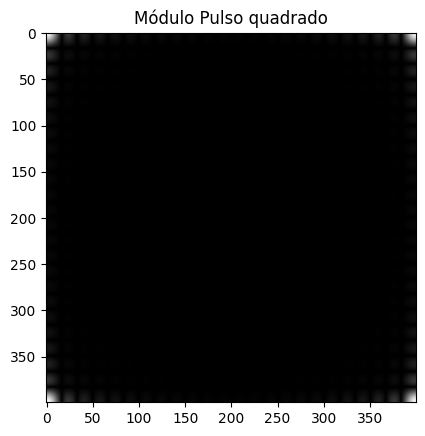

In [5]:
# cálculo da transformada de Fourier 2D
transf_2D = np.fft.fft2(pulso)
# módulo - POIS A TRANSFORMADA DÁ PARA NÓS COEFICIENTES COMPLEXOS
modulo_2D = np.abs(transf_2D)
#Gráfico
plot.figure()
plot.title('Módulo Pulso quadrado')
plot.imshow(modulo_2D, cmap = 'gray')



Problema: os componentes de baixa frequência aparecem nas extremidades da transformada. Para normalizar, usamos a função np.fft.fftshift

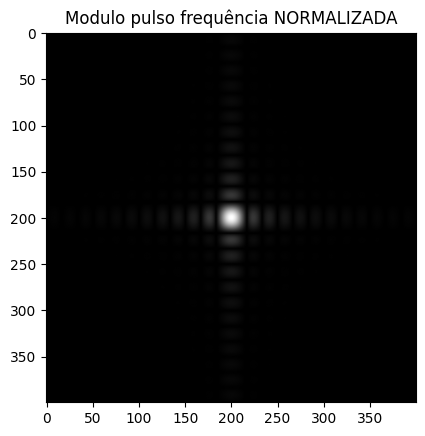

In [6]:
frequencia_deslocada = np.fft.fftshift(modulo_2D)
plot.figure()
plot.title('Modulo pulso frequência NORMALIZADA')
plot.imshow(frequencia_deslocada, cmap = 'gray')

O logaritmo "achata" os valores, permitindo que você veja os detalhes menores (as frequências mais altas) que estavam escondidos na escuridão.

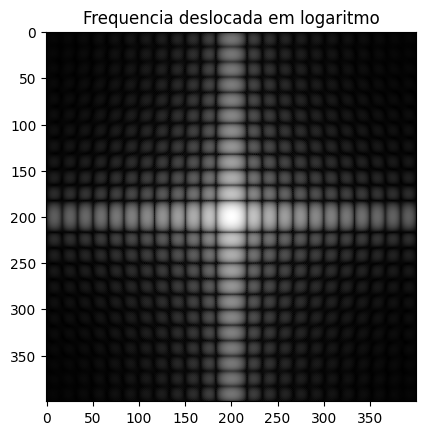

In [7]:
plt.figure() 
plt.title('Frequencia deslocada em logaritmo') 
plt.imshow(np.log(1 + np.abs(frequencia_deslocada)), cmap='gray') 

### Questão 4. Filtragem no domínio da frequência
Sabendo que as baixas frequências estão no centro de frequencia_deslocada, 
como seria um filtro passa baixas ideal (H), para passar até 10% da 
frequência máxima da imagem? 

In [8]:
# ---criar uma máscara H que seja do mesmo tamanho da imagem da transformada(frequencia_deslocada)
# Tamanho de frequencia_deslocada
(M, N) = np.shape(frequencia_deslocada)
#mascara H inicializada com 0, com o mesmo tamanho de frequencia_deslocada
H = np.zeros((M,N), dtype = complex)#vai receber número complexo
